In [1]:
import sqlite3 as sql

import numpy as np
import pandas as pd
from pandas import cut, read_sql
import pickle as pkl
from random import choices
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.optimize as optimize
from standard_plotting import set_size

In [2]:
indir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/track_cascade_sets/"
small_small_MC = pd.read_csv(indir + 'Old_muon_more_noise_Monte_Carlo_neutrino_prob_logit_above_12_all_variables.csv').reset_index(drop=True)
outdir = "/groups/icecube/peter/workspace/analyses/multiclassification_track_cascade_neutrinos/plots/sneaky_muon_analysis/"

In [3]:
small_small_MC = small_small_MC[small_small_MC['L3_oscNext_bool']==1]
print(len(small_small_MC))

347


In [4]:

def calc_rho_36(x,y) :
    '''
    Radial distance from string 36 (approximately central within DeepCore)
    '''
    return np.sqrt( (x-46.29) ** 2 + (y+34.88) ** 2 )

small_small_MC['rho_pred'] = calc_rho_36(small_small_MC['position_x_pred'].values,small_small_MC['position_y_pred'].values)
small_small_MC['rho'] = calc_rho_36(small_small_MC['position_x'].values,small_small_MC['position_y'].values)


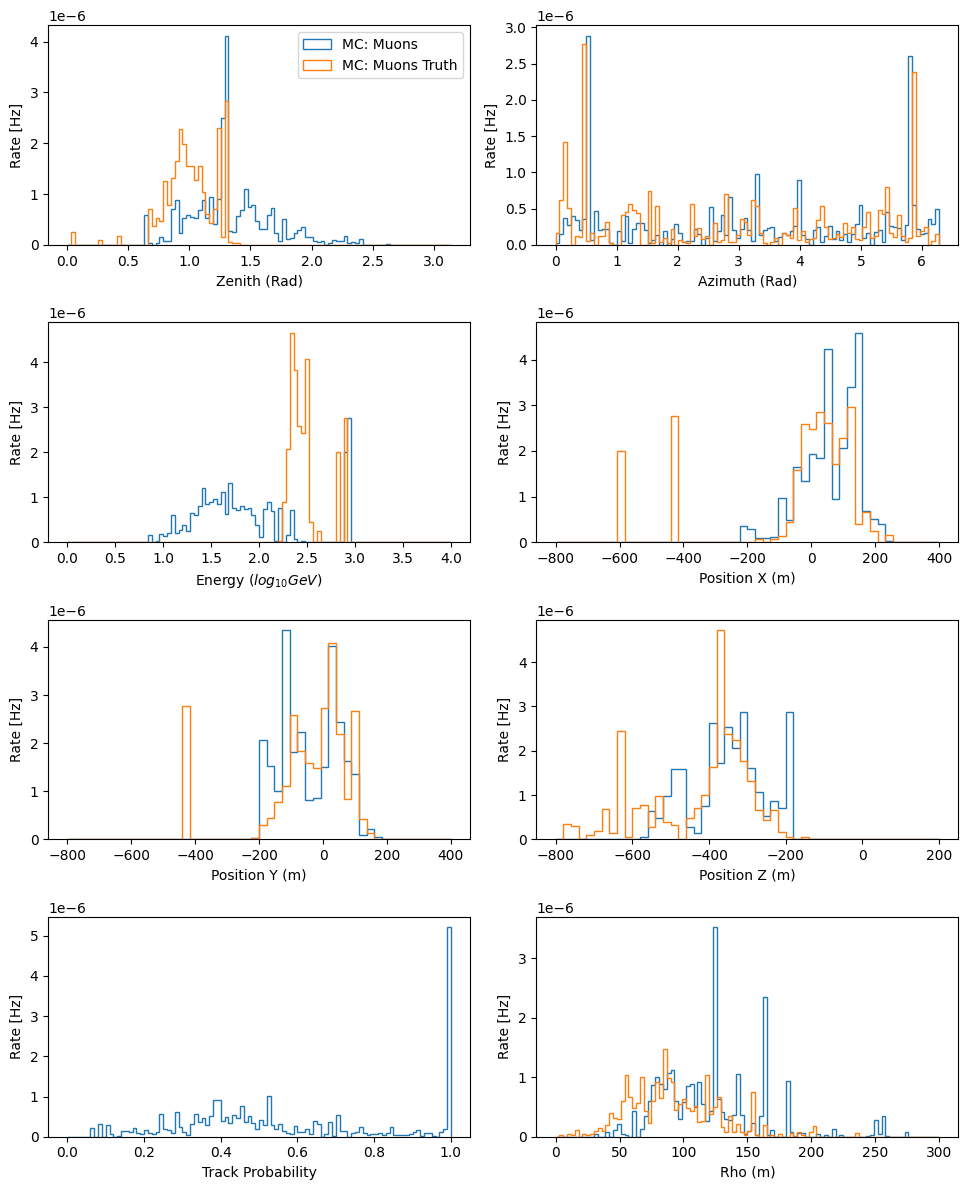

In [5]:
fig, axs = plt.subplots(4,2,figsize=set_size('thesis',fraction=1.75,subplots=(4,2),y_size=12))

bins=np.linspace(0,np.pi,101)
axs[0,0].hist(small_small_MC['zenith_pred'], histtype='step',density=False,label='MC: Muons',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])
axs[0,0].hist(small_small_MC['zenith'], histtype='step',density=False,label='MC: Muons Truth',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])

axs[0,0].set_xlabel('Zenith (Rad)')
axs[0,0].set_ylabel('Rate [Hz]')
#axs[0,0].set_xlim(right=3.7)
axs[0,0].legend(loc='upper right')


bins=np.linspace(0,2*np.pi,101)
axs[0,1].hist(small_small_MC['azimuth_pred'], histtype='step',density=False,label='MC Muons',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])
axs[0,1].hist(small_small_MC['azimuth'], histtype='step',density=False,label='MC Muons Truth',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])

axs[0,1].set_xlabel('Azimuth (Rad)')
axs[0,1].set_ylabel('Rate [Hz]')



bins=np.linspace(0,4,101)
axs[1,0].hist(np.log10(small_small_MC['energy_pred']), histtype='step',density=False,label='MC Muons',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])
axs[1,0].hist(np.log10(small_small_MC['energy']), histtype='step',density=False,label='MC Muons Truth',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])

axs[1,0].set_xlabel(r'Energy $(log_{10} GeV)$')
axs[1,0].set_ylabel('Rate [Hz]')


up = 400
down = -800
bins=np.linspace(down,up,51)
axs[1,1].hist(np.clip(small_small_MC['position_x_pred'],down,up), histtype='step',density=False,label='MC Muons',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])
axs[1,1].hist(np.clip(small_small_MC['position_x'],down,up), histtype='step',density=False,label='MC Muons Truth',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])

axs[1,1].set_xlabel('Position X (m)')
axs[1,1].set_ylabel('Rate [Hz]')


up = 400
down = -800
bins=np.linspace(down,up,51)
axs[2,0].hist(np.clip(small_small_MC['position_y_pred'],down,up), histtype='step',density=False,label='MC Muons',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])
axs[2,0].hist(np.clip(small_small_MC['position_y'],down,up), histtype='step',density=False,label='MC Muons Truth',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])

axs[2,0].set_xlabel('Position Y (m)')
axs[2,0].set_ylabel('Rate [Hz]')


up = 200
down = -800
bins=np.linspace(down,up,51)
axs[2,1].hist(np.clip(small_small_MC['position_z_pred'],down,up), histtype='step',density=False,label='MC Muons',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])
axs[2,1].hist(np.clip(small_small_MC['position_z'],down,up), histtype='step',density=False,label='MC Muons Truth',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])

axs[2,1].set_xlabel('Position Z (m)')
axs[2,1].set_ylabel('Rate [Hz]')


bins=np.linspace(0,1,101)
axs[3,0].hist(small_small_MC['track_mu_pred'], histtype='step',label='MC: Muons',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])

axs[3,0].set_xlabel('Track Probability')
axs[3,0].set_ylabel('Rate [Hz]')


bins=np.linspace(0,300,101)
axs[3,1].hist(small_small_MC['rho_pred'], histtype='step',label='MC: Muons',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])
axs[3,1].hist(small_small_MC['rho'], histtype='step',label='MC: Muons Truth',bins=bins,alpha=1,weights=small_small_MC['total_osc_weight'])

axs[3,1].set_xlabel('Rho (m)')
axs[3,1].set_ylabel('Rate [Hz]')

fig.tight_layout()

fig.savefig(outdir + 'muon_noise_neutrinos_where_in_all_predictions.png',bbox_inches='tight',dpi=200)

In [6]:
print(np.sum(small_small_MC['total_osc_weight'][small_small_MC['track_mu_pred']>0.9]))
print(np.sum(small_small_MC['total_osc_weight'][small_small_MC['track_mu_pred']<0.5]))

6.032904554603147e-06
1.2961106425194043e-05


In [7]:
print(np.sum(small_small_MC['total_osc_weight']))
small_small_MC_with_zenith_cut = small_small_MC[np.cos(small_small_MC['zenith_pred'])<0.3]
print(np.sum(small_small_MC_with_zenith_cut['total_osc_weight']))

small_small_MC_with_zenith_cut_and_energy = small_small_MC[(np.cos(small_small_MC['zenith_pred'])<0.3) & (small_small_MC['energy_pred'] > 5) & (small_small_MC['energy_pred'] < 300)]
print(np.sum(small_small_MC_with_zenith_cut['total_osc_weight']))


small_small_MC_with_zenith_cut_and_energy_and_containment = small_small_MC[(np.cos(small_small_MC['zenith_pred'])<0.3) & (small_small_MC['energy_pred'] > 5) & (small_small_MC['energy_pred'] < 300) & (small_small_MC['position_z'] > -500) & (small_small_MC['position_z'] < -200) & (small_small_MC['rho'] < 300)]
print(np.sum(small_small_MC_with_zenith_cut_and_energy_and_containment['total_osc_weight']))


2.601973584428542e-05
1.655312154992638e-05
1.655312154992638e-05
7.667196746526316e-06


In [8]:
# indir_small_small_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/track_cascade_sets/Burnsample_1_percent_neutrino_prob_logit_above_12_all_variables.csv"

In [9]:
# small_small_RD = pd.read_csv(indir_small_small_RD).reset_index(drop=True)

In [10]:
# print(small_small_RD.head(10))